In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
menu = pd.read_csv('../data/DIM_MENU_ITEM.csv')

In [4]:
menu.tail()

,menuItemID,organizationID,locationID,SiteID,POS_SystemID,menuItemMasterID,menuItemReportID,menuItemName1,majorGroupID,majorGroupMasterID,...,masterAlias,align,xbrCategory,customerInfoType,myInvUpdateFlag,lastUpdateDatetime,lastUsedDatetime,doNotReport,familyGroupNameMaster,majorGroupNameMaster
12058,7838601,10001,3000,6,93,7838600,7838600,1/2 TOP SHELF,6281766,6268338,...,0,0,NaN,NaN,1,8/28/2017 17:00,NaN,NaN,VODKA,LIQUOR
12059,7838651,10001,3000,6,93,7838650,7838650,1/2 WELL,6281766,6268338,...,0,0,NaN,NaN,1,8/28/2017 17:00,NaN,NaN,VODKA,LIQUOR
12060,7838653,10001,3000,6,93,7838652,7838652,1/2 DOUBLE,6281766,6268338,...,0,0,NaN,NaN,1,8/28/2017 17:02,NaN,NaN,VODKA,LIQUOR
12061,7838654,10001,3000,6,93,6292212,6292212,1/2 WINE,6281767,6268340,...,0,0,NaN,NaN,1,8/28/2017 17:02,NaN,NaN,GLS MERLOT,WINE
12062,7864900,10001,3000,6,93,6300580,6300580,BEEF LO MEIN,6281773,6273090,...,0,0,NaN,NaN,1,9/25/2017 13:58,NaN,NaN,APPETIZER,PREMIUM FOOD


In [5]:
menu.rename(columns={'menuItemID': 'recordID'}, inplace=True)
menu.head()

,recordID,organizationID,locationID,SiteID,POS_SystemID,menuItemMasterID,menuItemReportID,menuItemName1,majorGroupID,majorGroupMasterID,...,masterAlias,align,xbrCategory,customerInfoType,myInvUpdateFlag,lastUpdateDatetime,lastUsedDatetime,doNotReport,familyGroupNameMaster,majorGroupNameMaster
0,8122034,200,1,15,16,8122033,8122033,Gluten Free Juic,811998,811998,...,0,0,NaN,NaN,1/1/1900 0:00,11/13/2015 10:30,NaN,NaN,NaN,NaN
1,7841299,200,1,15,16,7841298,7841298,Buff Chix Stk,811996,811996,...,0,0,NaN,NaN,1/1/1900 0:00,9/27/2012 18:10,NaN,NaN,NaN,NaN
2,7726145,200,1,15,16,7726144,7726144,Whole Fruit,811996,811996,...,0,0,NaN,NaN,1/1/1900 0:00,3/19/2015 14:21,NaN,NaN,NaN,NaN
3,7403682,200,1,15,16,7403681,7403681,Coffee Cake,811996,811996,...,0,0,NaN,NaN,1/1/1900 0:00,7/29/2015 9:46,NaN,NaN,NaN,NaN
4,5351336,200,1,15,16,5351335,5351335,Dog 90Min IPA,812002,812002,...,0,0,NaN,NaN,1/1/1900 0:00,8/25/2011 10:49,NaN,NaN,NaN,NaN


## FACT SITES

### Chunk up the data and read it in 100,000 records at a time.

In [6]:
fact = pd.read_csv('../data/FACT_Sites_2017.csv', parse_dates=True,
                   na_values='NULL', chunksize=100000, iterator=True,
                       
                      usecols=['guestCheckLineItemID', 'Site', 'revenueCenterID',
                               'Location', 'orderTypeID', 'fixedPeriod',
                               'guestCheckID', 'posTransRef', 'serviceRoundNum',
                               'lineNum', 'seatNum', 'detailType', 'detailDesc',
                               'recordID', 'posRef', 'priceLevel', 'uwsID',
                               'workstation', 'checkEmployeeID', 
                               'managerEmployeeID', 'voidFlag', 'reasonCode',
                               'lineCount', 'lineTotal', 'lineTotal2',
                               'reportLineCount', 'reportLineTotal'])

In [7]:
#df = pd.concat(fact, ignore_index=True)
df = fact.get_chunk()
df.head()

,guestCheckLineItemID,Site,revenueCenterID,Location,orderTypeID,fixedPeriod,guestCheckID,posTransRef,serviceRoundNum,lineNum,...,workstation,checkEmployeeID,managerEmployeeID,voidFlag,reasonCode,lineCount,lineTotal,lineTotal2,reportLineCount,reportLineTotal
0,132451542,Site1,811898,C04 LIBERTY GRLL,146867,57,22840740,7859,1,21,...,304_2,841293,NaN,0,0,1,10.0,0.0,0,10.0
1,132605169,Site1,811898,C04 LIBERTY GRLL,146867,59,22850584,7124,1,21,...,304_2,841293,NaN,0,0,1,11.0,0.0,0,11.0
2,132737533,Site1,811898,C04 LIBERTY GRLL,146867,60,22859884,7124,1,21,...,304_2,841293,NaN,0,0,1,11.0,0.0,0,11.0
3,131944665,Site1,811869,123 PHILLY FAVS,146867,48,22805115,169,1,21,...,123_4,815460,NaN,0,0,1,6.0,0.0,0,6.0
4,132276245,Site1,811867,120 PENN PIZZA,146867,54,22828624,3194,1,21,...,120_2,836854,NaN,0,0,1,11.0,0.0,0,11.0


### We have Locations that are 1:1 associated with revenueCenterID and multiple workstations per Location.

In [8]:
df.groupby(['Location', 'revenueCenterID','uwsID']).size()

Location          revenueCenterID  uwsID   
101 PENN PIZZA    811852           812067      259
                                   812069      519
                                   812070      277
                                   812071      440
                                   812072      229
                                   812075      238
102 AB PORT       18422348         18422359    119
102 CHCKIE PETES  811853           812076      642
                                   812077      534
                                   812078      508
                                   812081      727
                                   812082      401
                                   812083      556
103 Miller Port   18422350         812234      110
104 PHILLY FAVS   811854           812084      178
                                   812087      331
                                   812088      427
                                   812089      383
                                   812

### Makes a function that groups menuItemName1 by the guestCheckID. Now we have all receipt items provided a chunk from the csv file.

In [9]:
def generateMarket(dfIter):
    masterMenuList = list()
    for chunk in dfIter:
        m_faqs = menu.merge(chunk)
        basketList = m_faqs.groupby('guestCheckID')['menuItemName1'].apply(list)
        for basket in basketList:
            masterMenuList.append(basket)
    return masterMenuList

In [10]:
allBaskets = generateMarket(fact)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [11]:
allBaskets

[['Chocolate Milk'],
 ['Souvenir Soda', 'Snapple Tea'],
 ['Bass Fresh Fries'],
 ['20oz Water'],
 ['20oz G2 LemonLim'],
 ['20oz Water'],
 ['Liq Tier 2 '],
 ['CP 3.25oz Cup'],
 ['Snapple Apple'],
 ['Liq Tier 2 '],
 ['Liq Tier 2 '],
 ['Liq Tier 2 '],
 ['Roll Cheesesteak'],
 ['Cup Smoothie'],
 ['Pretzel Braided'],
 ['Pretzel Braided'],
 ['Liq Tier 2 '],
 ['Pretzel Braided'],
 ['Pretzel Braided'],
 ['Bacon Mac Burger'],
 ['Bass Fresh Fries'],
 ['Liq Tier 2 '],
 ['Small Soda', 'Wine Spark White', 'Liq Tier 2 ', 'Wht Zin Split'],
 ['Liq Tier 2 ', 'Cup Smoothie'],
 ['Small Soda', 'Wine Spark Red'],
 ['20oz Water'],
 ['20oz Water'],
 ['20oz Water'],
 ['Small Soda'],
 ['Liq Tier 2 '],
 ['2lb Tender Fd Tr'],
 ['20oz Water'],
 ['Chard Split'],
 ['Small Soda', 'Small Soda', 'Hot Dog Eagles'],
 ['20oz Water', 'Cup Frozen Drink', 'Liq Tier 2 '],
 ['Wine 187 Cab', 'Wine Spark Red', 'Domestic Draft', 'Chard Split'],
 ['Personal Pizza'],
 ['Domestic Draft'],
 ['Pretzel Braided'],
 ['Snapple Apple'],
 ['

In [12]:
len(allBaskets)

3138976

### Run the A Priori Algorithm to find frequent itemsets of 1 to 3. A Priori uses a triangular matrix approach. Itemsets are built off of previously determined itemsets.

In [13]:
from itertools import combinations
def apriori(groceryBaskets, support=0.01):
    """Return a dictionary of itemsets that are frequent.
    
    Keys in the returned dictionary are itemsets; 
    values are corresponding support fractions.
    
    datastream: CSV file with market basket data
    support: threshold
    """
    freqItemsets = defaultdict(dict)
    i = 0
    while True:
        i += 1
        count = defaultdict(int)
        for basket in groceryBaskets:
            if i==1:
                items = basket
            else:
                items = [item for item in basket 
                         if frozenset([item]) in freqItemsets[1]]
            for group in combinations(items, i):
                for subgroup in combinations(group, i-1):
                    if frozenset(subgroup) not in freqItemsets[i-1]:
                        break
                # found a candidate group of items!
                count[frozenset(list(group))] += 1
        for g in count:
            freq = count[g]/len(groceryBaskets)
            if freq >= support:
                freqItemsets[i][g] = freq
        msg = "Frequent itemsets of size {0} at support threshold {1} = {2}"
        print(msg.format(i, support, len(freqItemsets[i])))
        if len(freqItemsets[i]) == 0 or i == 3:
            break
    return freqItemsets

In [14]:
from collections import defaultdict
import random

### Finds frequent itemsets for all the data.

In [15]:
freqsets = apriori(allBaskets, 0.01)

Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1


### Plot the top twenty frequent items that represent the entire data.

In [16]:
import matplotlib.pyplot as plt

def plotTopTwenty(groceryBaskets, support=0.01):
    """Make an inline plot of the top twenty most frequent items
    
    datafile: CSV file with market basket data
    support: threshold
    """
    freqSingle = {}
    numBaskets = 0
    items = []
    
    for basket in groceryBaskets:
        for item in basket:
            if item in freqSingle:
                freqSingle[item] += 1
            else:
                freqSingle[item] = 1
        numBaskets +=1
    
    # Keep only frequent items
    freqSingle = {key: value for key, value in freqSingle.items() if (value/numBaskets) >= support}
    
    # Plotting
    for key in freqSingle:
        items.append([key, freqSingle[key]])
    
    items.sort(key=lambda x: x[1], reverse = True)
    x = [items[i][0] for i in range(20)]
    y = [items[i][1] for i in range(20)]
    
    fig = plt.figure()

    width = .5
    ind = np.arange(20)
    plt.bar(ind, y, width=width)
    plt.xticks(ind + width / 2, x, rotation = 'vertical')
    plt.xlabel('Top 20 Frequent Items')
    plt.ylabel('Frequencies')
    plt.show()


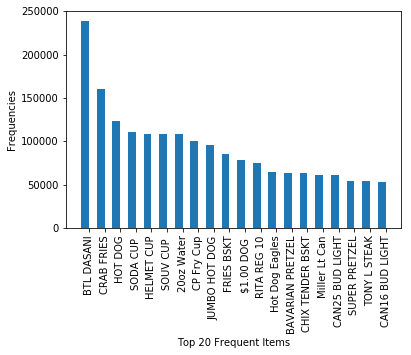

In [17]:
plotTopTwenty(allBaskets)

** Frequent pairs of the entire dataset.**

In [18]:
freqsets[2]

{frozenset({'BTL DASANI'}): 0.010901962933134883,
 frozenset({'$1.00 DOG '}): 0.017510806071789016,
 frozenset({'FRIED ONIONS', 'TONY L STEAK'}): 0.010463603417165342}

### Find frequent itemsets per location for all Locations if available.
- Put all menu items into respective baskets.

- Then generate hash tables for the frequent itemsets of sizes 1 to 3 per Location.

- Put all hash tables into one hash table.

In [289]:
ds = Digraph(name='Structure')
ds.node('Hash Table')

ds.node('Location 1')
ds.node('...')
ds.node('Size 2 Itemsets')
ds.node('Size 3 Itemsets')
ds.node('Itemsets')
ds.edge('Hash Table', 'Location 1')
ds.edge('Hash Table', '...')

ds.edge('Location 1', 'Size 1 Itemsets')
ds.edge('Location 1', 'Size 2 Itemsets')
ds.edge('Location 1', 'Size 3 Itemsets')

ds.edge('Size 3 Itemsets', 'Itemsets')
ds.graph_attr['rankdir'] = 'TD'


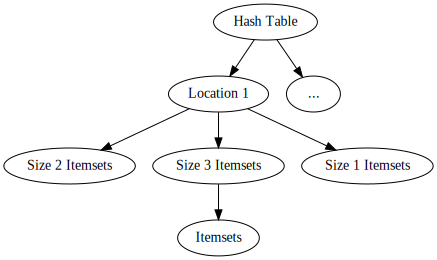

In [290]:
ds

In [19]:
def generateMarketChunks(chunk):
    masterMenuList = list()
    m_faqs = chunk.merge(menu)
    basketList = m_faqs.groupby('guestCheckID')['menuItemName1'].apply(list)
    for basket in basketList:
        masterMenuList.append(basket)
    return masterMenuList

In [20]:
def generateLocFreqs(df):
    locFreqs = defaultdict(dict)
    for loc in df.Location.unique():
        locFreqs[loc] = apriori(generateMarketChunks(df[df.Location == loc]), 0.01)
        #print("Success")
    return locFreqs

In [21]:
def generateIndMarket(bigdf):
    masterLocs = dict()
    for chunk in bigdf:
        masterLocs.update(generateLocFreqs(chunk))
    return masterLocs

In [22]:
locfreqs = generateLocFreqs(df)

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 12
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 4
Freq

In [23]:
fact = pd.read_csv('../data/FACT_Sites_2017.csv', parse_dates=True,
                   na_values='NULL', chunksize=100000, iterator=True, 
                      usecols=['Location', 'guestCheckID', 'recordID'])

In [24]:
locFreqDict = generateIndMarket(fact)

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 12
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 15
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent

Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent 

Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 211
Frequent itemsets of size 3 at support threshold 0.01 = 1139
Freq

Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent 

Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequen

Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent

Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent ite

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent it

Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequen

Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent

Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent i

Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 288
Frequent itemsets of size 3 at support threshold 0.01 = 1762
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent 

Frequent itemsets of size 3 at support threshold 0.01 = 717
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 5
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent 

Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent it

Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 60
Frequent itemsets of size 2 at support threshold 0.01 = 84
Frequent itemsets of size 3 at support threshold 0.01 = 218
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 42
Frequent itemsets of size 3 at support threshold 0.01 = 39
Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 106
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 5

Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 10
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 27
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 40
Frequent itemsets of size 3 at support threshold 0.01 = 27
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 6
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 19
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 36

Frequent itemsets of size 3 at support threshold 0.01 = 24
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 25
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 64
Frequent itemsets of size 3 at support threshold 0.01 = 61
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 30
Frequent itemsets of size 3 at support threshold 0.01 = 32
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 39
Frequent itemsets of size 3 at support threshold 0.01 = 19
Frequent itemsets of size 1 at support threshold 0.01 = 2

Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 47
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 45
Frequent itemsets of size 3 at support threshold 0.01 = 45
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 13
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 44
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 48
Frequent itemsets of size 3 at support threshold 0.01 = 46
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 43
Frequent itemsets of size 3 at support threshold 0.01 = 46
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 37


Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 17
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 10
Freq

Frequent itemsets of size 2 at support threshold 0.01 = 37
Frequent itemsets of size 3 at support threshold 0.01 = 30
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 53
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 5


Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 67
Frequent itemsets of size 3 at support threshold 0.01 = 107
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 10
F

Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 50
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 57
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 59
Frequent itemsets of size 2 at support threshold 0.01 = 76
Fre

Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 31
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 65
Frequent itemsets of size 3 at support threshold 0.01 = 64
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 61
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 40
Frequent itemsets of size 2 at support threshold 0.01 = 128
Frequent itemsets of size 3 at support threshold 0.01 = 167
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 25
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 19
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 7
F

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 16
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 91
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 42
Frequent itemsets of size 3 at support threshold 0.01 = 224
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 2

Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 264
Frequent itemsets of size 3 at support threshold 0.01 = 2005
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 49
Fre

Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 44
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 3
Freque

Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent i

Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent it

Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 29
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 43
Frequent itemsets of size 3 at support threshold 0.01 = 28
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent

Frequent itemsets of size 3 at support threshold 0.01 = 34
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 71
Frequent itemsets of size 3 at support threshold 0.01 = 241
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 17
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 46
Frequent itemsets of size 2 at support threshold 0.01 = 5
Freque

Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 86
Frequent itemsets of size 2 at support threshold 0.01 = 132
Frequent itemsets of size 3 at support threshold 0.01 = 253
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 7
Fr

Frequent itemsets of size 2 at support threshold 0.01 = 85
Frequent itemsets of size 3 at support threshold 0.01 = 275
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 24
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
F

Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 27
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 33
Frequent itemsets of size 3 at support threshold 0.01 = 24
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 29
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 3
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 46
Frequent itemsets of size 3 at support threshold 0.01 = 180
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 38
Frequent itemsets of size 3 at support threshold 0.01 = 27
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 10
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 60
Frequent itemsets of size 3 at support threshold 0.01 = 74
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 31
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 42
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 10
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 19
Frequent itemsets of size 1 at support threshold 0.01 = 47
Frequent itemsets of size 2 at support threshold 0.01 = 43
Frequent itemsets of size 3 at support threshold 0.01 = 36
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 9
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 92
Frequent itemsets of size 2 at support threshold 0.01 = 100
Frequent itemsets of size 3 at support threshold 0.01 = 156
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 8
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 16
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 11
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 255
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 11
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent i

Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent it

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 54
Frequent itemsets of size 3 at support threshold 0.01 = 56
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 16
Frequent itemsets of size 1 at support threshold 0.01 = 28

Frequent itemsets of size 3 at support threshold 0.01 = 22
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 55
Frequent itemsets of size 3 at support threshold 0.01 = 61
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 29
F

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 22
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 70
Frequent itemsets of size 3 at support threshold 0.01 = 102
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 27
Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 55
Frequent itemsets of size 2 at support threshold 0.01 = 82
Frequent itemsets of size 3 at support threshold 0.01 = 150
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 =

Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 42
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 47
Frequent itemsets of size 3 at support threshold 0.01 = 38
Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 17
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 158
Frequent itemsets of size 3 at support threshold 0.01 = 2

Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 37
Frequent itemsets of size 3 at support threshold 0.01 = 29
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 33
Frequent itemsets of size 3 at support threshold 0.01 = 21
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 15


Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 41
Frequent itemsets of size 2 at support threshold 0.01 = 96
Frequent itemsets of size 3 at support threshold 0.01 = 129
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 42
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 34
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequ

Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 37
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 26
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 49
Frequent itemsets of size 2 at support threshold 0.01 = 89
Frequent itemsets of size 3 at support threshold 0.01 = 458
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 36
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 14

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 49
Frequent itemsets of size 3 at support threshold 0.01 = 38
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 11


Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 28
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 43
Frequent itemsets of size 2 at support threshold 0.01 = 58
Frequent itemsets of size 3 at support threshold 0.01 = 101
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 42


Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 22
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 43
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 2
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 62
Frequent itemsets of size 3 at support threshold 0.01 = 114
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 18


Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 51
Frequent itemsets of size 2 at support threshold 0.01 = 67
Frequent itemsets of size 3 at support threshold 0.01 = 65
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent i

Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 42
Frequent itemsets of size 3 at support threshold 0.01 = 77
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 41
F

Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 59
Frequent itemsets of size 3 at support threshold 0.01 = 123
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 29
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 46
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 89
Frequent itemsets of size 2 at support threshold 0.01 = 274
Frequent itemsets of size 3 at support threshold 0.01 = 498
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 41
Frequent itemsets of size 2 at support threshold 0.01 = 11


Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 68
Frequent itemsets of size 3 at support threshold 0.01 = 68
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 16
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 59
Frequent itemsets of size 3 at support threshold 0.01 = 94
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 47
Freque

Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 49
Frequent itemsets of size 2 at support threshold 0.01 = 170
Frequent itemsets of size 3 at support threshold 0.01 = 279
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 16
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 17
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 21
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 130
Frequent itemsets of size 3 at support threshold 0.01 = 209
Frequent itemsets of size 1 at support threshold 0.01 = 49
Frequent itemsets of size 2 at support threshold 0.01 = 130
Frequent itemsets of size 3 at support threshold 0.01 = 292
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 

Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 36
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 19
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 16
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 49
Frequent itemsets of size 3 at support threshold 0.01 = 37
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 

Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 61
Frequent itemsets of size 2 at support threshold 0.01 = 81
Frequent itemsets of size 3 at support threshold 0.01 = 149
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 3
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 36
Frequent itemsets of size 3 at support threshold 0.01 = 72
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 28
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 14

Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 28
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 7
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 66
Frequent itemsets of size 3 at support threshold 0.01 = 129
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 48
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 17

Frequent itemsets of size 2 at support threshold 0.01 = 39
Frequent itemsets of size 3 at support threshold 0.01 = 30
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 25
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 11
Fr

Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent 

Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 17
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 7
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 41
Frequent itemsets of size 3 at support threshold 0.01 = 41
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 113
Frequent itemsets of size 2 at support threshold 0.01 = 311
Frequent itemsets of size 3 at support threshold 0.01 = 654
Frequent itemsets of size 1 at support threshold 0.01 = 44
Frequent itemsets of size 2 at support threshold 0.01 = 44

Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 36
Frequent itemsets of size 3 at support threshold 0.01 = 43
Frequent itemsets of size 1 at support threshold 0.01 = 56
Frequent itemsets of size 2 at support threshold 0.01 = 39
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 30
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 4
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 40
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 35
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 40
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 21
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 49
Frequent itemsets of size 3 at support threshold 0.01 = 47
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 21

Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 66
Frequent itemsets of size 3 at support threshold 0.01 = 64
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 45
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13

Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent 

Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 99
Frequent itemsets of size 3 at support threshold 0.01 = 581
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 44
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 472
Frequent itemsets of size 3 at support threshold 0.01 = 4584
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 54
Fr

### Association rules shows 'fried onions' imply 'Tony's [cheese]steaks'

In [25]:
## TODO
def getRules(freqItemSets, confidence=0.8):
    """Return all association rules with minimum confidence
    
    Return value is a list of pairs, with the first component 
    being a list-valued frequent itemset of the form I-{j} and 
    the second a singleton frequent item j
    
    freqItemSets: dictionary returned by A-Priori algorithm
    confidence: minimum confidence
    """
    n = max(freqItemSets.keys())-1  # last pass of apriori 
    rules = []
    for itemset in freqItemSets[n]:
        if len(itemset) > 1:
            # itemset has n items
            for i in range(1,n): # number of items on RHS of a possible rule
                for rhs in combinations(itemset, i):
                    lhs = itemset - set(rhs)
                    c = freqItemSets[n][itemset]/freqItemSets[len(lhs)][lhs]
                    if c >= confidence:
                        #print(c)
                        rules.append((list(lhs), list(rhs)))
    return rules   

In [394]:
## DO NOT MODIFY
for lhs, rhs in getRules(freqsets, confidence=0.8):
    print("{0} -> {1}".format(lhs, rhs))

['FRIED ONIONS'] -> ['TONY L STEAK']


Report on your findings from the datasets using an appropriate visualization or descriptive listing, e.g. of the top ten association rules in decreasing order of confidence, or the top ten rules that have high **interest**, where *interest* of a rule $I \implies j$ is defined as the difference between the confidence of the rule and the support of $j$. 

In [395]:
## TODO 
interest = dict()
conf = dict()
for lhs, rhs in getRules(freqsets, confidence=0.5):
    n = len(lhs+rhs)
    itemset = frozenset(lhs+rhs)
    conf[(tuple(lhs), tuple(rhs))] = freqsets[n][itemset]
    interest[(tuple(lhs), tuple(rhs))] = freqsets[n][itemset] - freqsets[len(rhs)][frozenset(rhs)]
sort_conf = sorted([(conf[k], k) for k in conf], reverse=True)
sort_interest = sorted([(interest[k], k) for k in interest], reverse=True)


In [396]:
for p, (lhs, rhs) in sort_conf:
    print("{0} -> {1} with confidence {2}".format(lhs, rhs, p))

('TONY L STEAK',) -> ('FRIED ONIONS',) with confidence 0.010463603417165342
('FRIED ONIONS',) -> ('TONY L STEAK',) with confidence 0.010463603417165342


In [397]:
for p, (lhs, rhs) in sort_interest:
    print("{0} -> {1} with interest {2}".format(lhs, rhs, p))

('TONY L STEAK',) -> ('FRIED ONIONS',) with interest -0.00033386684065121915
('FRIED ONIONS',) -> ('TONY L STEAK',) with interest -0.006901932349912838


In [387]:
def cleanseFreqs(lfd):
    for lkey in list(lfd.keys()):
        if len(lfd[lkey][1]) == 0:
            try:
                del lfd[lkey]
            except KeyError as err:
                pass
    return lfd

In [391]:
locFreqDict = cleanseFreqs(locFreqDict)

### Grab a random location and see if it has frequent itemsets for a specified itemset size. If so, make a bar plot.

In [398]:
from IPython.display import display
from graphviz import Digraph
from ipywidgets import interactive
from ipywidgets import interact

In [418]:
def randVendorFreqs(locFreqDict, groupSize=1):
    vendor = np.random.choice( list( locFreqDict.keys() ) )
    
    highFreqs = [('frequency', sorted(list(locFreqDict[vendor][groupSize].values()))[:4]),
                    ('itemGroup', sorted(list(locFreqDict[vendor][groupSize].keys()))[:4])]
    freqTable = pd.DataFrame.from_items(highFreqs)
    if len(locFreqDict[vendor][groupSize]) > 0:
        freqTable.sort_values('frequency', ascending=False, inplace=True)
        freqTable.reset_index(inplace=True, drop=True)
        display(freqTable)
        freqTable.plot.bar(legend=False)
        plt.xticks(np.arange(len(freqTable)), freqTable.itemGroup.apply(tuple), rotation = 'vertical')
        plt.ylim((0, (freqTable.frequency.iloc[0] )*1.2))
        plt.title(vendor)
        plt.ylabel('Frequency')
        plt.figure(figsize=(20,10))
        plt.show()
    else: return 1
        #print("Vendor \'{0}\' does not have any frequent groups of size {1}" \
        #        " that meet the support threshold.".format(vendor, groupSize))
    return 0
    

,frequency,itemGroup
0,0.027027,"(CAN24 MILLER LT, CAN25 BUD LIGHT)"
1,0.027027,"(CAN16 VICTORY SL, CAN16 BUD LIGHT)"
2,0.018018,(CAN24 MILLER LT)
3,0.018018,"(CAN16 VICTORY SL, CAN24 MILLER LT)"


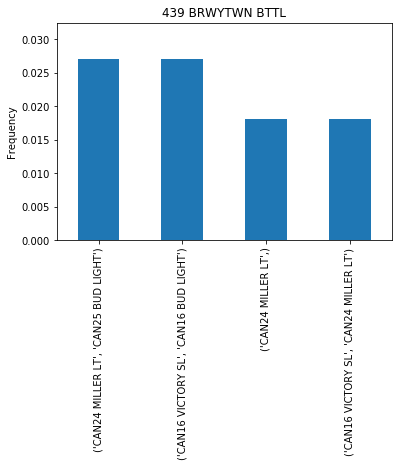

In [419]:
while(randVendorFreqs(locFreqDict, 2) == 1): pass

### Dislike random selection? Choose one yourself. ('102 BREWERYTOWN') perhaps.

447 FUNNEL CAKE

In [405]:
def getVendorFreqs(vendor, locFreqDict, groupSize=1):
    if vendor in locFreqDict:
        highFreqs = [('frequency', sorted(list(locFreqDict[vendor][groupSize].values()))[:4]),
                        ('itemGroup', sorted(list(locFreqDict[vendor][groupSize].keys()))[:4])]
        freqTable = pd.DataFrame.from_items(highFreqs)
        if len(locFreqDict[vendor][groupSize]) > 0:
            freqTable.sort_values('frequency', ascending=False, inplace=True)
            freqTable.reset_index(drop=True, inplace=True)
            display(freqTable)
            freqTable.plot.bar(legend=False)
            plt.xticks(np.arange(len(freqTable)), freqTable.itemGroup.apply(tuple), rotation = 'vertical')
            plt.ylim((0, (freqTable.frequency.iloc[0] )*1.2))
            plt.title(vendor)
            plt.ylabel('Frequency')
            plt.figure(figsize=(20,10))
            plt.show()
        else: print("Vendor \'{0}\' does not have any frequent groups of size {1}" \
                    " that meet the support threshold.".format(vendor, groupSize))

,frequency,itemGroup
0,0.015267,(DOGFISH IPA LPD)
1,0.015267,(MARG FRZN 1)
2,0.015267,(CAN24 MILLER LT)
3,0.015267,(CAN24 DOS EQUIS)


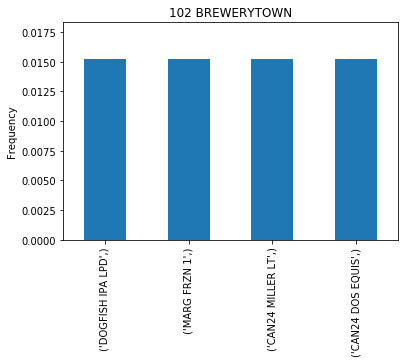

In [406]:
getVendorFreqs('102 BREWERYTOWN', locFreqDict, 1)

In [393]:
def dfSuggested(sg):
    suggex = pd.DataFrame()
    for tup in sg:
        suggex[frozenset(tup[0])] = list(tup[1])
    return suggex

In [392]:
@interact
def getSuggestion(vendor=locFreqDict):
    #print(vendor)
    highFreqs = [('frequency', sorted(list(vendor[1].values()))[:4]),
                    ('itemGroup', sorted(list(vendor[1].keys()))[:4])]
    high3Freqs = [('frequency', sorted( list( vendor[3].values() ) ) ),
                    ('itemGroup', sorted(list(vendor[3].keys())))]
    freqTable = pd.DataFrame.from_items(highFreqs)
    if len(vendor[1]) > 0:
        freqTable.sort_values('frequency', ascending=False, inplace=True)
        freqTable.reset_index(drop=True, inplace=True)
        suggested = list()
        
        for item in highFreqs[1][1]:
            superset = set()
            for fsets in high3Freqs[1][1]:
                if item.issubset(fsets):
                    superset.update(set(fsets) - set(item))
            suggested.append((set(item), superset))
            
        display(dfSuggested(suggested))
        #display(freqTable)
        
        freqTable.plot.bar()
        plt.xticks(np.arange(len(freqTable)), freqTable.itemGroup.apply(tuple), rotation = 'vertical')
        plt.ylim((0, (freqTable.frequency.iloc[0] )*1.2))
        #plt.title(vendor)
        plt.figure(figsize=(20,10))
        plt.ylabel('Frequency')
        plt.show()
    else: print("NO FREQUENT ITEMS")

In [334]:
locFreqDict['414GRILL']

defaultdict(dict,
            {0: {},
             1: {frozenset({'JUMBO HOT DOG'}): 0.27972027972027974,
              frozenset({'BTL DASANI'}): 0.07692307692307693,
              frozenset({'SMART WTR 1L'}): 0.055944055944055944,
              frozenset({'CAN16 BUD LIGHT'}): 0.1258741258741259,
              frozenset({'$1.00 DOG '}): 0.027972027972027972,
              frozenset({'CAN16 BUDWEISER'}): 0.055944055944055944,
              frozenset({'SAUSAGE ITALIAN'}): 0.16783216783216784,
              frozenset({'CAN14.9 STELLA '}): 0.04195804195804196,
              frozenset({'CAN16 GOOSE IPA'}): 0.03496503496503497,
              frozenset({'BTL COKE'}): 0.04195804195804196,
              frozenset({'BTL DIET COKE'}): 0.06993006993006994,
              frozenset({'BTL TH LEMONADE'}): 0.027972027972027972,
              frozenset({'BTL TH DT GREEN'}): 0.013986013986013986,
              frozenset({'CAN16 YUENGLING'}): 0.04895104895104895,
              frozenset({'BTL COKE ZERO'}

In [187]:
locFreqDict['102 BREWERYTOWN']

defaultdict(dict,
            {0: {},
             1: {frozenset({'DOGFISH IPA LPD'}): 0.04580152671755725,
              frozenset({'MARG FRZN 1'}): 0.06870229007633588,
              frozenset({'CAN24 MILLER LT'}): 0.0916030534351145,
              frozenset({'CAN24 DOS EQUIS'}): 0.030534351145038167,
              frozenset({'MAKERS MARK 1'}): 0.022900763358778626,
              frozenset({'CHARD BERINGER'}): 0.015267175572519083,
              frozenset({'BTL DASANI'}): 0.06870229007633588,
              frozenset({'CAN16 CORONA'}): 0.022900763358778626,
              frozenset({'CAN16 YUENGLING'}): 0.015267175572519083,
              frozenset({'CAN24 YUENGLING'}): 0.030534351145038167,
              frozenset({'CAN16 COORS LT'}): 0.022900763358778626,
              frozenset({'CAN14.9 STELLA '}): 0.030534351145038167,
              frozenset({'CAN16 GOOSE IPA'}): 0.030534351145038167,
              frozenset({'DOGFISH IPA PD'}): 0.03816793893129771,
              frozenset({'SODA

In [35]:
locFreqDict['620 BREWTOWN']

defaultdict(dict,
            {0: {},
             1: {frozenset({'CAN25 BUD LT LIM'}): 0.06666666666666667,
              frozenset({'CAN16 BUD LT LM'}): 0.13333333333333333,
              frozenset({'CAN24 NB DAYBLAZ'}): 0.13333333333333333,
              frozenset({'CAN16 ANGRY ORCH'}): 0.13333333333333333,
              frozenset({'CAN16 STLLA CIDR'}): 0.06666666666666667,
              frozenset({'KOOZIE'}): 0.06666666666666667,
              frozenset({'CAN24 YUENG LITE'}): 0.06666666666666667,
              frozenset({'BTL COKE'}): 0.06666666666666667,
              frozenset({'CAN16 FAT TIRE'}): 0.06666666666666667,
              frozenset({'CAN16 GOOSE IPA'}): 0.06666666666666667,
              frozenset({'CAN25 BUD LIGHT'}): 0.06666666666666667,
              frozenset({'CAN24 MILLER LT'}): 0.06666666666666667},
             2: {}})